### Iris-Dataset

  - Regressão linear

In [2]:
import os, sys
import pandas as pd # pandas e seu alias pd
import numpy as np  # numpy  e seu alias np

from   scipy import stats
#-- for ANOVA
import statsmodels.api as sm
from   statsmodels.formula.api import ols

sys.path.insert(1, '../libs/')
from stat_lib import *

import seaborn as sns

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

### Vamos analisar agora 3 grupos
  - diabéticos
  - pré-diabéticos
  - saudáveis
  
  <br>
  - vocês perceberam que os grupos se "misturam ou pouco" (overlaps)
  
  <br>
  - reparem que eixo X são homens e eixo Y são mulheres

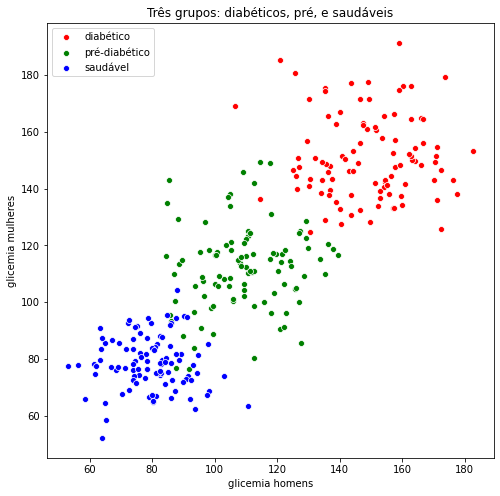

In [6]:
mu1 = 150; sdv1 = 15
mu2 = 110; sdv2 = 15
mu3 = 80;  sdv3 = 10
N   = 100

sampDH = np.random.normal(loc=mu1, scale=sdv1, size=N)
sampDM = np.random.normal(loc=mu1, scale=sdv1, size=N)

sampPreH = np.random.normal(loc=mu2, scale=sdv2, size=N)
sampPreM = np.random.normal(loc=mu2, scale=sdv2, size=N)

sampCH = np.random.normal(loc=mu3, scale=sdv3, size=N)
sampCM = np.random.normal(loc=mu3, scale=sdv3, size=N)


fig = plt.figure(figsize=(8, 8))

ax  = sns.scatterplot(sampDH,   sampDM,   label='diabético',     color='red')
ret = sns.scatterplot(sampPreH, sampPreM, label='pré-diabético', color='green', ax=ax)
ret = sns.scatterplot(sampCH,   sampCM,   label='saudável',      color='blue',  ax=ax)

plt.xlabel('glicemia homens')
plt.ylabel('glicemia mulheres')
plt.legend()
plt.title("Três grupos: diabéticos, pré, e saudáveis");

### Repare que a solução dos 3 grupos é mais fácil pois sabemos que há 3 grupos!
  - Quando se conhece os grupos: se diz que o problema é SUPERVISIONADO
  - Quando não se conhece os grupos: se diz que o problema é NÃO SUPERVISIONADO

### Não existe Simulação em Data-Science sem Validação
### Para tanto temos que ter 2 grupos: teste e validação
  - separe 70% dos dados para teste
  - separe 30% dos dados para validação

<br>
* - repare que 30% é um número qualquer, este valor pode ser de 10% a 50% dependendo do número amostral
<br>
** - há outras técnicas como:

    - leave one out (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html)
    - cross-validation (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate)

### O importante ao termos dados de Treinamento e Validação
  - Treiamento --> se faz o 'fitting', o ajuste do modelo
  - Teste --> mede-se a perfomance do modelo, o quanto ele acerta e erra (acuracidade)

In [20]:
df = pd.DataFrame([sampCH, sampCM, [0]*len(sampCH)]).T
df.columns = ['x', 'y', 'group']

df2 = pd.DataFrame([sampPreH, sampPreM, [1]*len(sampPreH)]).T
df2.columns = ['x', 'y', 'group']
df = df.append(df2)

df2 = pd.DataFrame([sampDH, sampDM, [2]*len(sampDH)]).T
df2.columns = ['x', 'y', 'group']
df = df.append(df2)

df.x = df.x.astype(float)
df.y = df.y.astype(float)
df.group = df.group.astype(int)

print('dim', df.shape)
print('\ngrupos:', df.group.unique())

df.head(3)

dim (300, 3)

grupos: [0 1 2]


,x,y,group
0,63.710327,83.319081,0
1,65.061863,85.690538,0
2,85.904761,92.636403,0


In [21]:
mat    = df[['x','y']].to_numpy()
group  = df.group.to_list()
print(mat.shape, len(group))

mat = [list(x) for x in mat]

(300, 2) 300


In [22]:
#-- matrix bidimension x versus y
mat[:3]

[[63.71032704737364, 83.31908147395106],
 [65.0618625654982, 85.69053794384506],
 [85.90476103939933, 92.63640290177031]]

In [23]:
#-- os grupos
group[:3]

[0, 0, 0]

In [26]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(mat, group, test_size=0.30)

print(len(X_train))
X_train[:3]

210


[[70.27420461149723, 67.69357354701724],
 [156.92708322529697, 152.5392457039823],
 [154.45686516428526, 143.0360543393133]]

### Não é isto que quero ...
### Isto é Efeito Sympson 

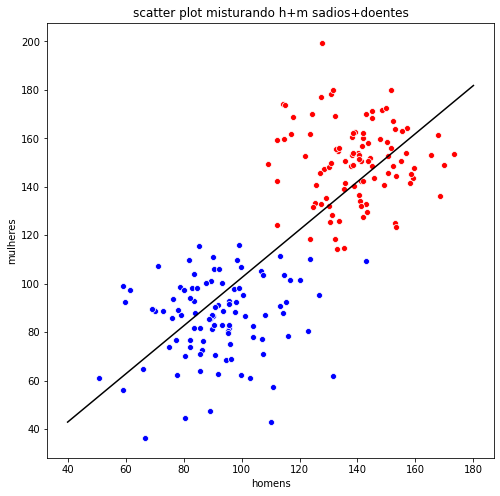

In [11]:
xseq = np.linspace(40, 180)
yseq = intercept + a * xseq

fig = plt.figure(figsize=(8, 8))

ax  = sns.scatterplot(sampDH, sampDM, color='red')
ret = sns.scatterplot(sampCH, sampCM, color='blue', ax=ax)

plt.plot(xseq, yseq, color='black')
plt.xlabel('homens')
plt.ylabel('mulheres')
plt.title('scatter plot misturando h+m sadios+doentes');

### O que quero deve ser uma "reta quase que ortogonal" que separe os dois grupos minimizando erros

por exemplo  

y = -x + 235


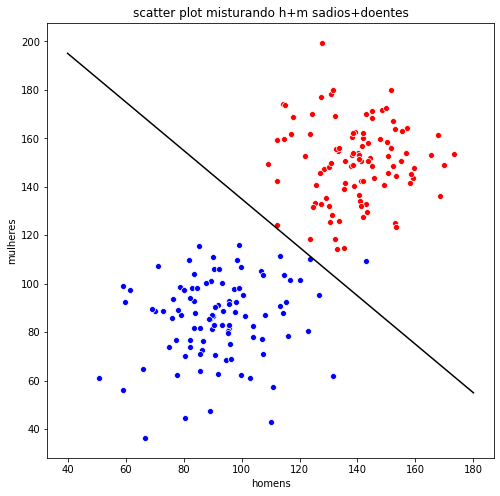

In [12]:
xseq = np.linspace(40, 180)
yseq = 235 -1*xseq

fig = plt.figure(figsize=(8, 8))

ax  = sns.scatterplot(sampDH, sampDM, color='red')
ret = sns.scatterplot(sampCH, sampCM, color='blue', ax=ax)

plt.plot(xseq, yseq, color='black')
plt.xlabel('homens')
plt.ylabel('mulheres')
plt.title('scatter plot misturando h+m sadios+doentes');

### Como funciona este classificador?

  - Todos os pontos acima da reta devem ser pacientes diabéticos
  - Todos os pontos abaixo da reta devem ser pacientes saudáveis

  - Porque utilizo o verbo **deve**?
  - Qual a função matemática para isto?

<br>
se y = -x * 235
<br><br>
então,  
y + x - 235 = 0 
<br><br> 
logo,
<br><br>

  - y + x - 235 > 0 => diabético  
  - y + x - 235 < 0 => saudável  
  - y + x - 235 = 0 => indeterminado
<br><br>
reflita sobre "= 0"
  - em vez de "igual a zero" poderíamos criar um faixa "próxima a zero"
<br><br>
é isto que SVM (support vector machine) faz ... mas não discutiremos esta técnica aqui